In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import torch
import utils
from generator import Generator
import matplotlib.pyplot as plt

# CIFAR

#### Create an object of class Generator
The Generator class contains functionality to help generate adversarial images, such as
- Generate adversarial images for a batch with the fool() method
- Experiment with the parameters of the fool() method with the fool_calibrate() method
- Visualize generated adversarial images from a random batch with _visualize() method, which is located inside fool_calibrate()

In [3]:
cifar_adv = Generator('cifar')

Took 2.10 seconds
Number in batch that model successfully predicts: 37/50
Number that terminated before max number of iterations: 37/50
Number successfully fooled: 37/50
Number with small enough perturbation: 37/50



Original Label: 7
Model prediction: 8


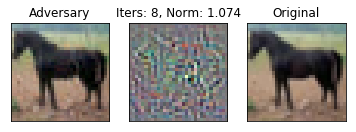



Original Label: 2
Model prediction: 8


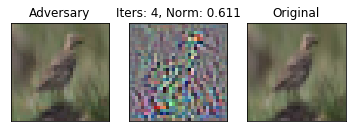



Original Label: 5
Model prediction: 8


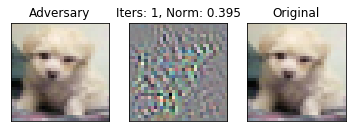



Original Label: 1
Model prediction: 8


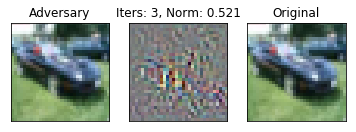



Original Label: 2
Model prediction: 8


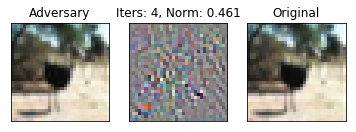



Original Label: 3
Model prediction: 8


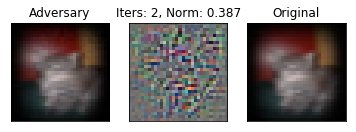



Original Label: 2
Model prediction: 8


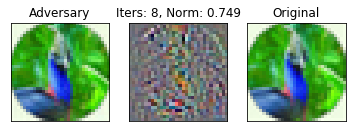



Original Label: 0
Model prediction: 8


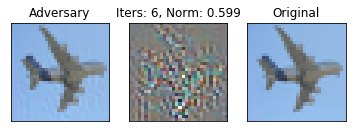



Original Label: 1
Model prediction: 8


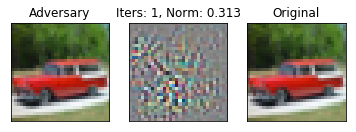



Original Label: 0
Model prediction: 8


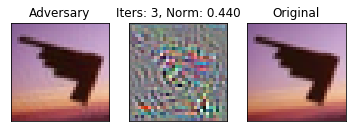



Original Label: 7
Model prediction: 8


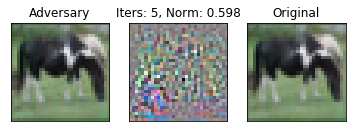



Original Label: 5
Model prediction: 8


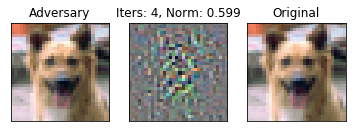



Original Label: 1
Model prediction: 8


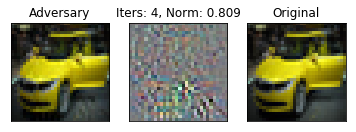



Original Label: 5
Model prediction: 8


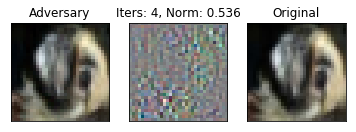



Original Label: 0
Model prediction: 8


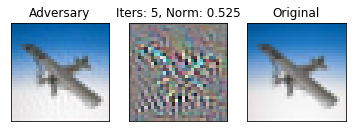



Original Label: 4
Model prediction: 8


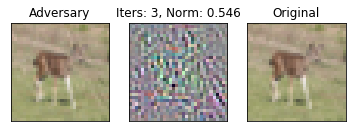



Original Label: 3
Model prediction: 8


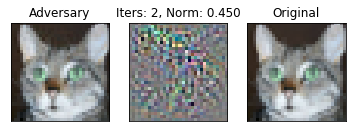



Original Label: 0
Model prediction: 8


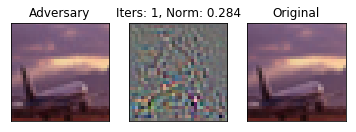



Original Label: 1
Model prediction: 8


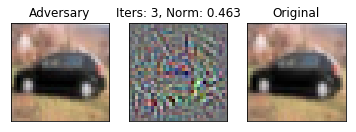



Original Label: 5
Model prediction: 8


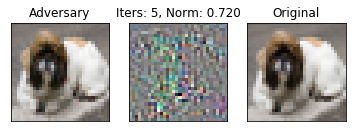



Original Label: 2
Model prediction: 8


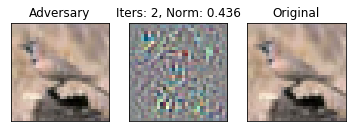



Original Label: 3
Model prediction: 8


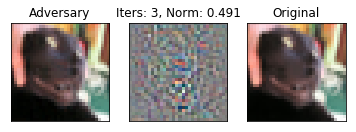



Original Label: 9
Model prediction: 8


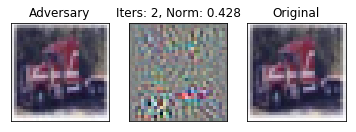



Original Label: 3
Model prediction: 8


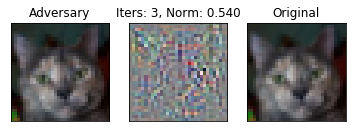



Original Label: 6
Model prediction: 8


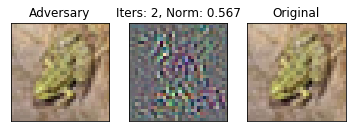



Original Label: 6
Model prediction: 8


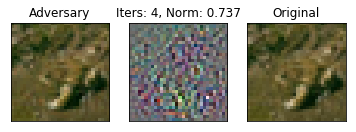



Original Label: 3
Model prediction: 8


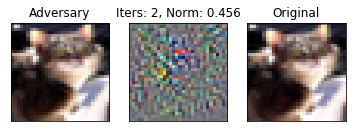



Original Label: 4
Model prediction: 8


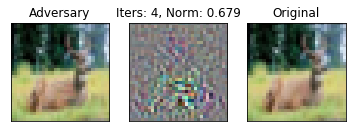



Original Label: 2
Model prediction: 8


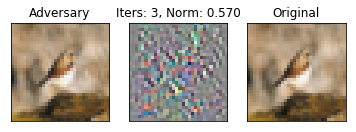



Original Label: 7
Model prediction: 8


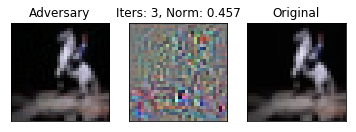



Original Label: 9
Model prediction: 8


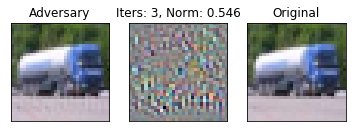



Original Label: 3
Model prediction: 8


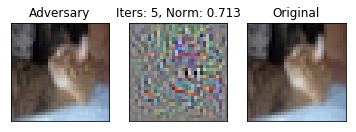



Original Label: 2
Model prediction: 8


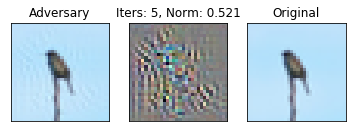



Original Label: 7
Model prediction: 8


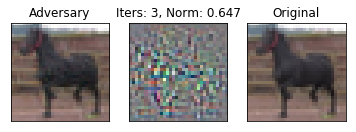



Original Label: 6
Model prediction: 8


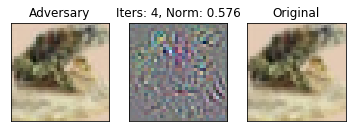



Original Label: 1
Model prediction: 8


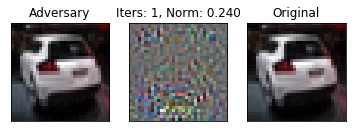



Original Label: 1
Model prediction: 8


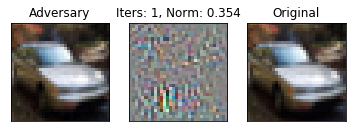

In [12]:
cifar_adv.fool_calibrate(target=8, epsilon=1e-2, num_iters=20, max_L2_norm=10, verbose=True)
# Try adjusting the epsilon parameter above; it's set to a really high number to
# make the adversarial images easily distinguishable to the human eye

# MNIST

In [14]:
mnist_adv = Generator('mnist')

Took 1.79 seconds
Number in batch that model successfully predicts: 43/50
Number that terminated before max number of iterations: 29/50
Number successfully fooled: 31/50
Number with small enough perturbation: 30/50



Original Label: 1
Model prediction: 4


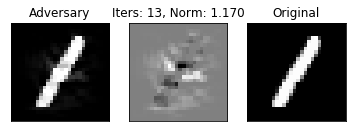



Original Label: 0
Model prediction: 4


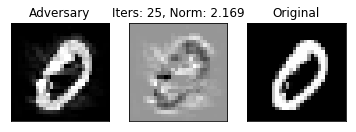



Original Label: 7
Model prediction: 4


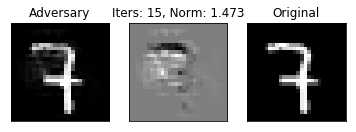



Original Label: 9
Model prediction: 4


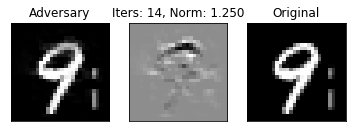



Original Label: 1
Model prediction: 4


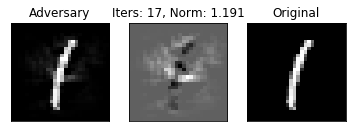



Original Label: 3
Model prediction: 4


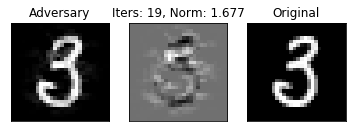



Original Label: 6
Model prediction: 4


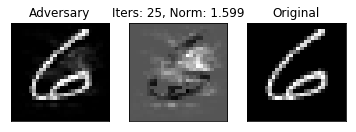



Original Label: 3
Model prediction: 4


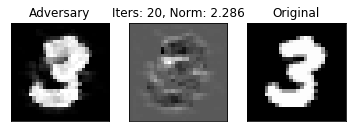



Original Label: 9
Model prediction: 4


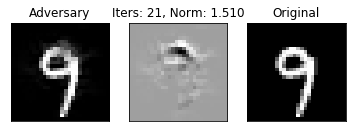



Original Label: 7
Model prediction: 4


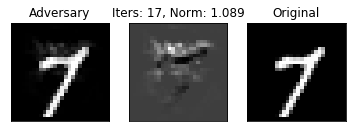



Original Label: 7
Model prediction: 4


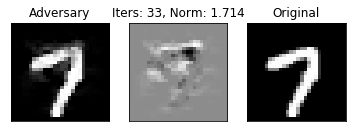



Original Label: 5
Model prediction: 4


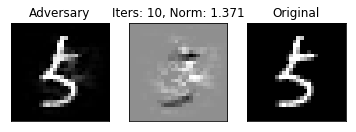



Original Label: 3
Model prediction: 4


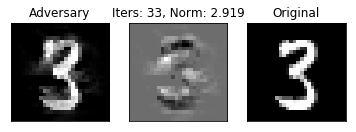



Original Label: 2
Model prediction: 4


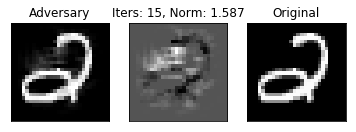



Original Label: 9
Model prediction: 4


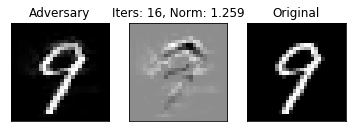



Original Label: 2
Model prediction: 4


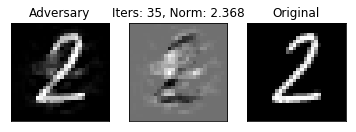



Original Label: 9
Model prediction: 4


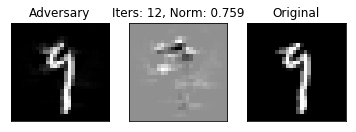



Original Label: 2
Model prediction: 4


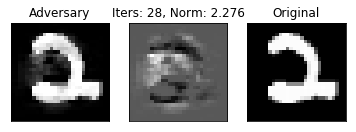



Original Label: 8
Model prediction: 4


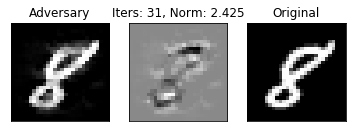



Original Label: 5
Model prediction: 4


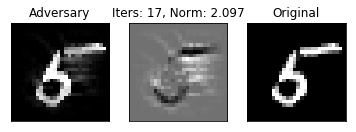



Original Label: 1
Model prediction: 4


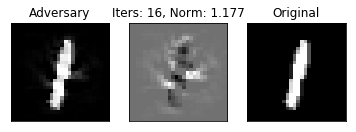



Original Label: 5
Model prediction: 4


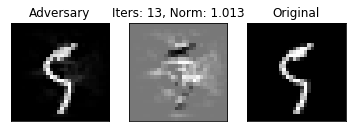



Original Label: 7
Model prediction: 4


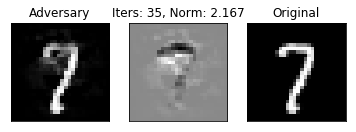



Original Label: 1
Model prediction: 4


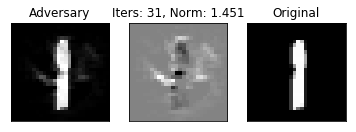



Original Label: 3
Model prediction: 4


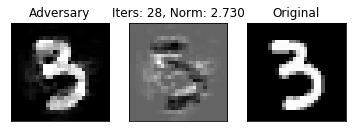



Original Label: 1
Model prediction: 4


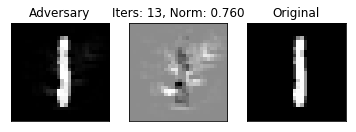



Original Label: 1
Model prediction: 4


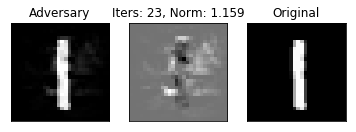



Original Label: 3
Model prediction: 4


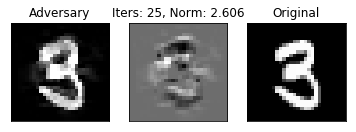



Original Label: 1
Model prediction: 4


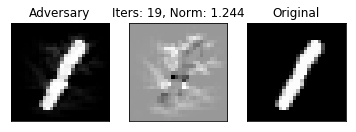



Original Label: 1
Model prediction: 4


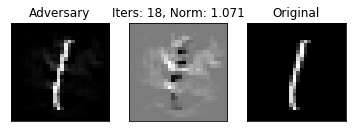

In [16]:
mnist_adv.fool_calibrate(target=4, epsilon=1e-2, num_iters=35, max_L2_norm=3.0, verbose=True)

# Create a dataset of adversarial images
The make_dataset() method inside the Adversarial_utils class will create a dataset of adversarial images. The data stored will contained the following for each example:
- The original image
- The perturbation added to the image
- The adversarial image
- The original label for the image
- The label for the class that the model gets tricked into predicting

In [17]:
file_name = 'mnist_test_dataset'
mnist_adv.make_dataset(file_name, num_examples=200, epsilon=5e-2, max_L2_norm=None)

Working on batch 0
Working on batch 1
Working on batch 2
Working on batch 3
Working on batch 4
Took 0.69 minutes


# Load a dataset of adversarial images
The get_adv_data() function inside utils.py will load a Pytorch dataloader object containing data for an existing dataset of adversarial images.

In [20]:
adv_data = utils.get_adv_data(file_name, original_label=1, target_label=8)

#### Plot a few examples

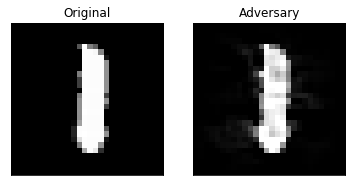

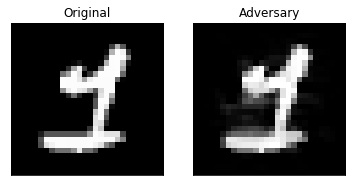

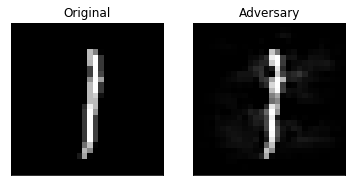

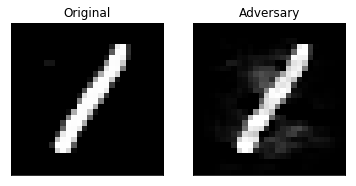

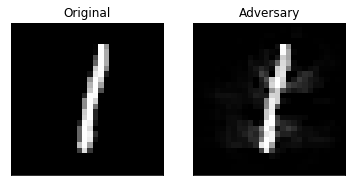

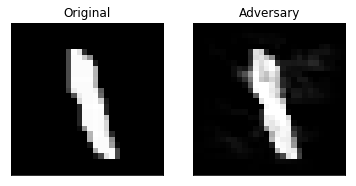

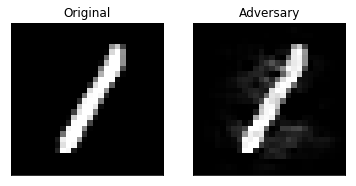

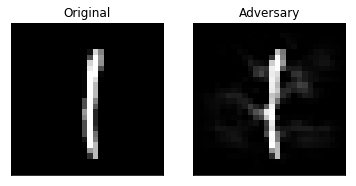

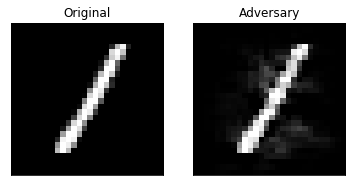

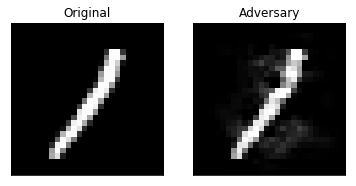

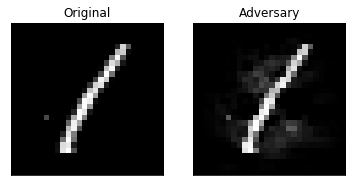

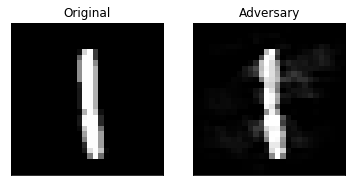

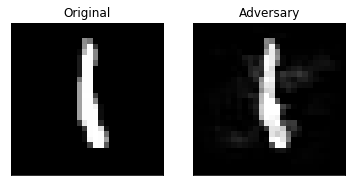

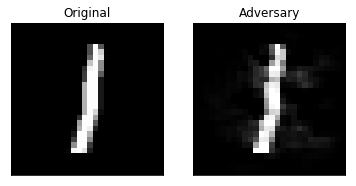

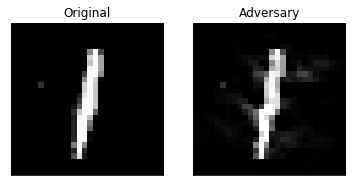

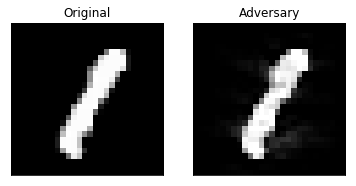

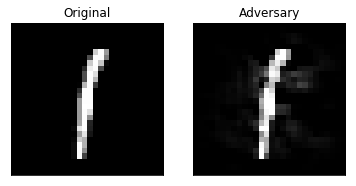

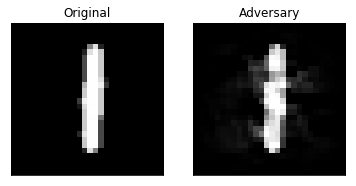

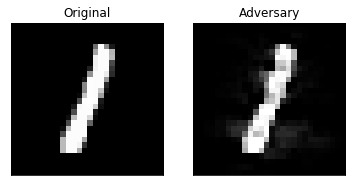

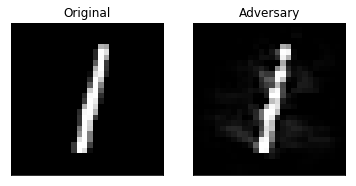

In [22]:
sample_batch = iter(adv_data).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(20):
    plt.subplot(1,2,1)
    plt.imshow(originals[i][0].numpy(), cmap='binary_r')
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i][0].numpy(), cmap='binary_r')
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()